In [1]:
%matplotlib inline



# Communities

This example shows how to visualize communities or clusters of a graph.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

First, we generate a graph. We use a famous graph here for simplicity:



In [3]:
g = ig.Graph.Famous("Zachary")

Edge betweenness is a standard way to detect communities. We then covert into
a :class:`igraph.VertexClustering` object for subsequent ease of use:



In [4]:
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

Next, we color each vertex and edge based on its community membership:



In [5]:
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

Last, we plot the graph. We use a fancy technique called proxy artists to
make a legend. You can find more about that in matplotlib's
:doc:`matplotlib:tutorials/intermediate/legend_guide`:



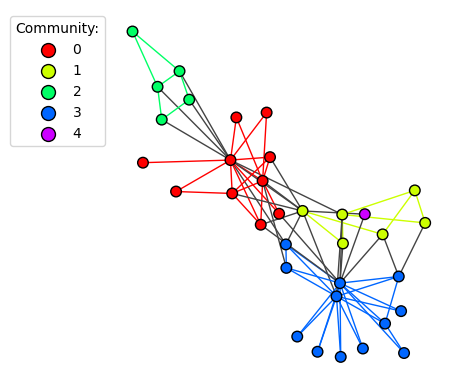

In [6]:
fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

For an example on how to generate the cluster graph from a vertex cluster,
check out `tutorials-cluster-graph`.

